In [1]:
import requests
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
import config
import logging
import importlib
import time
import random
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.common.exceptions import TimeoutException
import validators
import pickle
import time
import random
from calendar import monthrange
import re
import spacy
from spacy.tokens import Doc, Span
import nltk
from nltk.corpus import stopwords
from nltk.corpus import treebank
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin

from nltk import pos_tag, sent_tokenize, wordpunct_tokenize

pd.options.display.max_columns = 300
import string
import unicodedata

pd.options.display.max_columns = 200
pd.options.display.max_rows = 999
import matplotlib.pyplot as plt  

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.externals import joblib
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC  
from time import time
np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation

/Users/markbrennan/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/markbrennan/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
# with open('nyt_data.json') as f:
#     nyt_dict = json.load(f)

In [4]:
nyt_data_list = []

In [5]:
with open('nyt_data.json') as f:
    for line in f:
        nyt_data_list.append(eval(line))

In [6]:
cols = ['paper', 'date', 'section', 'url', 'headline', 'text']

In [7]:
df = pd.DataFrame.from_records(nyt_data_list, columns=cols)

In [8]:
df.head()

paper        date section  \
0   NYT  2019-10-01   World   
1   NYT  2019-10-01    U.S.   
2   NYT  2019-10-01   World   
3   NYT  2019-10-02    U.S.   
4   NYT  2019-10-02   World   

                                                 url  \
0  https://www.nytimes.com/2019/10/01/world/europ...   
1  https://www.nytimes.com/2019/09/30/us/judge-ca...   
2  https://www.nytimes.com/2019/10/01/world/asia/...   
3  https://www.nytimes.com/2019/10/02/us/politics...   
4  https://www.nytimes.com/2019/10/02/world/asia/...   

                                            headline  \
0  Finland School Stabbing Leaves 1 Dead and 10 I...   
1  Federal Judge in Kansas City Is Reprimanded fo...   
2  Protests Erupt in Hong Kong, Overshadowing Chi...   
3  Bernie Sanders Is Hospitalized, Raising Questi...   
4  China’s Global Message: We Are Tough but Not T...   

                                                text  
0  A stabbing attack on Tuesday at a vocational c...  
1  A federal judge in Kansas was given a rare pub...  
2  BEIJING — China’s authoritarian president used...  
3  Senator Bernie Sanders was recovering in a Las...  
4  BEIJING — As President Xi Jinping watched from...

In [9]:
df.iloc[0]['text']

'A stabbing attack on Tuesday at a vocational college in a shopping center in Finland killed one person and injured 10 others, the police said. The suspect in the attack is a Finnish student at the college, Savo Vocational College, which is at the Herman shopping center in the city of Kuopio, the police said. The assailant “had a sabre-like bladed weapon and a firearm in possession,” and both students and staff members were injured, as well as an officer who reportedly suffered minor injuries, according to the police.Reports of the attack came in shortly after noon local time, the police said in a statement. “Upon arrest, police used a firearm,” it said. “The suspect was seriously injured in the arrest and is being treated at Kuopio University Hospital.”The area was evacuated and an investigation is underway. A student, Janette Blomberg, 16, told the Finnish newspaper Helsingin Sanomat that she had been in class when she heard a man shouting nearby. As she was leaving the area, she add

In [10]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/markbrennan/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/Users/markbrennan/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [11]:
nlp = spacy.load('en')

In [33]:
' '.join([ word.lemma_ for word in NLP(df.iloc[0]['text'])])

'a stab attack on Tuesday at a vocational college in a shopping center in Finland kill one person and injure 10 other , the police say . the suspect in the attack be a finnish student at the college , Savo Vocational College , which be at the Herman shopping center in the city of Kuopio , the police say . the assailant " have a sabre - like bladed weapon and a firearm in possession , " and both student and staff member be injure , as well as an officer who reportedly suffer minor injury , accord to the police . report of the attack come in shortly after noon local time , the police say in a statement . " upon arrest , police use a firearm , " -PRON- say . " the suspect be seriously injure in the arrest and be be treat at Kuopio University Hospital . ”The area be evacuate and an investigation be underway . a student , Janette Blomberg , 16 , tell the finnish newspaper Helsingin Sanomat that -PRON- have be in class when -PRON- hear a man shout nearby . as -PRON- be leave the area , -PRON

In [35]:
l = [(df.iloc[0]['text'])]

In [36]:
l

['A stabbing attack on Tuesday at a vocational college in a shopping center in Finland killed one person and injured 10 others, the police said. The suspect in the attack is a Finnish student at the college, Savo Vocational College, which is at the Herman shopping center in the city of Kuopio, the police said. The assailant “had a sabre-like bladed weapon and a firearm in possession,” and both students and staff members were injured, as well as an officer who reportedly suffered minor injuries, according to the police.Reports of the attack came in shortly after noon local time, the police said in a statement. “Upon arrest, police used a firearm,” it said. “The suspect was seriously injured in the arrest and is being treated at Kuopio University Hospital.”The area was evacuated and an investigation is underway. A student, Janette Blomberg, 16, told the Finnish newspaper Helsingin Sanomat that she had been in class when she heard a man shouting nearby. As she was leaving the area, she ad

In [39]:
t = (df.iloc[0]['text'])

In [42]:
lt = t.split('.')

In [43]:
len(lt)

12

In [44]:
lt

['A stabbing attack on Tuesday at a vocational college in a shopping center in Finland killed one person and injured 10 others, the police said',
 ' The suspect in the attack is a Finnish student at the college, Savo Vocational College, which is at the Herman shopping center in the city of Kuopio, the police said',
 ' The assailant “had a sabre-like bladed weapon and a firearm in possession,” and both students and staff members were injured, as well as an officer who reportedly suffered minor injuries, according to the police',
 'Reports of the attack came in shortly after noon local time, the police said in a statement',
 ' “Upon arrest, police used a firearm,” it said',
 ' “The suspect was seriously injured in the arrest and is being treated at Kuopio University Hospital',
 '”The area was evacuated and an investigation is underway',
 ' A student, Janette Blomberg, 16, told the Finnish newspaper Helsingin Sanomat that she had been in class when she heard a man shouting nearby',
 ' As 

In [57]:
tokens.extend([nltk.word_tokenize(sentence) for sentence in lt])

In [59]:
tokens = []
for sentence in lt:
    tokens.extend(nltk.word_tokenize(sentence))

In [71]:
tokens

['A',
 'stabbing',
 'attack',
 'on',
 'Tuesday',
 'at',
 'a',
 'vocational',
 'college',
 'in',
 'a',
 'shopping',
 'center',
 'in',
 'Finland',
 'killed',
 'one',
 'person',
 'and',
 'injured',
 '10',
 'others',
 ',',
 'the',
 'police',
 'said',
 'The',
 'suspect',
 'in',
 'the',
 'attack',
 'is',
 'a',
 'Finnish',
 'student',
 'at',
 'the',
 'college',
 ',',
 'Savo',
 'Vocational',
 'College',
 ',',
 'which',
 'is',
 'at',
 'the',
 'Herman',
 'shopping',
 'center',
 'in',
 'the',
 'city',
 'of',
 'Kuopio',
 ',',
 'the',
 'police',
 'said',
 'The',
 'assailant',
 '“',
 'had',
 'a',
 'sabre-like',
 'bladed',
 'weapon',
 'and',
 'a',
 'firearm',
 'in',
 'possession',
 ',',
 '”',
 'and',
 'both',
 'students',
 'and',
 'staff',
 'members',
 'were',
 'injured',
 ',',
 'as',
 'well',
 'as',
 'an',
 'officer',
 'who',
 'reportedly',
 'suffered',
 'minor',
 'injuries',
 ',',
 'according',
 'to',
 'the',
 'police',
 'Reports',
 'of',
 'the',
 'attack',
 'came',
 'in',
 'shortly',
 'after',
 'n

In [77]:
tagged = nltk.pos_tag(tokens)

In [78]:
tagged

[('A', 'DT'),
 ('stabbing', 'JJ'),
 ('attack', 'NN'),
 ('on', 'IN'),
 ('Tuesday', 'NNP'),
 ('at', 'IN'),
 ('a', 'DT'),
 ('vocational', 'JJ'),
 ('college', 'NN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('shopping', 'NN'),
 ('center', 'NN'),
 ('in', 'IN'),
 ('Finland', 'NNP'),
 ('killed', 'VBD'),
 ('one', 'CD'),
 ('person', 'NN'),
 ('and', 'CC'),
 ('injured', 'VBD'),
 ('10', 'CD'),
 ('others', 'NNS'),
 (',', ','),
 ('the', 'DT'),
 ('police', 'NN'),
 ('said', 'VBD'),
 ('The', 'DT'),
 ('suspect', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('attack', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('Finnish', 'JJ'),
 ('student', 'NN'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('college', 'NN'),
 (',', ','),
 ('Savo', 'NNP'),
 ('Vocational', 'NNP'),
 ('College', 'NNP'),
 (',', ','),
 ('which', 'WDT'),
 ('is', 'VBZ'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('Herman', 'NNP'),
 ('shopping', 'NN'),
 ('center', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('city', 'NN'),
 ('of', 'IN'),
 ('Kuopio', 'NNP'),
 (',', ','),
 ('the', 'DT'),
 ('pol

In [79]:
entities = nltk.chunk.ne_chunk(tagged)

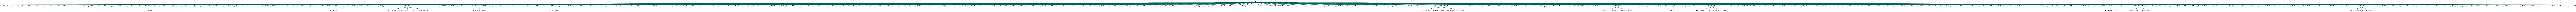

In [80]:
entities

In [87]:
lemmatize = WordNetLemmatizer()

In [88]:
type(lemmatize)

nltk.stem.wordnet.WordNetLemmatizer

In [95]:
text = nltk.Text(word.lower() for word in tokens)

In [96]:
text

<Text: a stabbing attack on tuesday at a vocational...>

In [100]:
text.similar(

No matches


In [101]:
text.generate()

said in a shopping center in the arrest and is being treated at kuopio
university hospital ” the area , she saw blood on the floor and
several wounded people another witness told the finnish outlet mtv
news that a teacher at the college , savo vocational college in a
shopping center in the attack is a finnish student at the herman
shopping center in the arrest and is being treated at kuopio
university hospital ” the area , she saw blood on the floor and
several wounded people another witness told the finnish newspaper
helsingin sanomat that she had


Building ngram index...


'said in a shopping center in the arrest and is being treated at kuopio\nuniversity hospital ” the area , she saw blood on the floor and\nseveral wounded people another witness told the finnish outlet mtv\nnews that a teacher at the college , savo vocational college in a\nshopping center in the attack is a finnish student at the herman\nshopping center in the arrest and is being treated at kuopio\nuniversity hospital ” the area , she saw blood on the floor and\nseveral wounded people another witness told the finnish newspaper\nhelsingin sanomat that she had'

In [110]:
text.vocab()

FreqDist({'the': 22, ',': 15, 'a': 13, 'in': 9, 'and': 9, 'at': 5, 'police': 5, 'said': 5, 'was': 5, 'she': 5, ...})

In [60]:
my_stopwords = set(stopwords.words('english'))

In [61]:
my_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [114]:
len(tokens)

248

In [115]:
words = [token for token in tokens if token not in my_stopwords]

In [116]:
len(words)

156

In [117]:
text = nltk.Text(word.lower() for word in words)

In [118]:
text.vocab()

FreqDist({',': 15, 'police': 5, 'said': 5, 'injured': 4, 'the': 4, '“': 4, '”': 4, 'attack': 3, 'college': 3, 'finnish': 3, ...})

In [123]:
text

<Text: a stabbing attack tuesday vocational college shopping center...>

In [127]:
doc = NLP(df.iloc[0]['text'])

In [128]:
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])

Noun phrases: ['A stabbing attack', 'Tuesday', 'a vocational college', 'a shopping center', 'Finland', 'one person', '10 others', 'the police', 'The suspect', 'the attack', 'a Finnish student', 'the college', 'Savo Vocational College', 'which', 'the Herman shopping center', 'the city', 'Kuopio', 'the police', 'The assailant', 'a sabre-like bladed weapon', 'a firearm', 'possession', 'both students', 'staff members', 'an officer', 'who', 'minor injuries', 'the police', 'Reports', 'the attack', 'noon', 'local time', 'the police', 'a statement', 'arrest', 'police', 'a firearm', 'it', 'The suspect', 'the arrest', 'Kuopio University Hospital', '”The area', 'an investigation', 'A student', 'Janette Blomberg', 'the Finnish newspaper', 'Helsingin Sanomat', 'she', 'class', 'she', 'a man', 'she', 'the area', 'she', 'she', 'blood', 'the floor', 'several wounded people', 'Another witness', 'the Finnish outlet', 'MTV News', 'a teacher', 'the school', 'a student', 'a sword', 'Prime Minister Antti Rin

In [129]:
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

Verbs: ['stab', 'kill', 'injure', 'say', 'say', 'injure', 'suffer', 'accord', 'come', 'say', 'use', 'say', 'injure', 'treat', 'evacuate', 'tell', 'hear', 'shout', 'leave', 'add', 'see', 'wound', 'tell', 'bleed', 'injure', 'call', 'say', 'monitor']


In [130]:
for entity in doc.ents:
    print(entity.text, entity.label_)

Tuesday DATE
Finland GPE
one CARDINAL
10 CARDINAL
Finnish NORP
Savo Vocational College ORG
Herman ORG
Kuopio GPE
noon TIME
Kuopio University Hospital ORG
”The area GPE
Janette Blomberg PERSON
16 DATE
Finnish NORP
Helsingin Sanomat PERSON
Finnish NORP
MTV News ORG
Antti Rinne PERSON


In [139]:
[token.text for token in doc]

['A',
 'stabbing',
 'attack',
 'on',
 'Tuesday',
 'at',
 'a',
 'vocational',
 'college',
 'in',
 'a',
 'shopping',
 'center',
 'in',
 'Finland',
 'killed',
 'one',
 'person',
 'and',
 'injured',
 '10',
 'others',
 ',',
 'the',
 'police',
 'said',
 '.',
 'The',
 'suspect',
 'in',
 'the',
 'attack',
 'is',
 'a',
 'Finnish',
 'student',
 'at',
 'the',
 'college',
 ',',
 'Savo',
 'Vocational',
 'College',
 ',',
 'which',
 'is',
 'at',
 'the',
 'Herman',
 'shopping',
 'center',
 'in',
 'the',
 'city',
 'of',
 'Kuopio',
 ',',
 'the',
 'police',
 'said',
 '.',
 'The',
 'assailant',
 '“',
 'had',
 'a',
 'sabre',
 '-',
 'like',
 'bladed',
 'weapon',
 'and',
 'a',
 'firearm',
 'in',
 'possession',
 ',',
 '”',
 'and',
 'both',
 'students',
 'and',
 'staff',
 'members',
 'were',
 'injured',
 ',',
 'as',
 'well',
 'as',
 'an',
 'officer',
 'who',
 'reportedly',
 'suffered',
 'minor',
 'injuries',
 ',',
 'according',
 'to',
 'the',
 'police',
 '.',
 'Reports',
 'of',
 'the',
 'attack',
 'came',
 'in

In [136]:
len(doc.vocab)

603

In [197]:
from spacy.vocab import Vocab
vocab = Vocab(strings=[token.text for token in doc])


In [160]:
words = [lex for lex in vocab]

In [161]:
len(words)

136

In [162]:
for word in words:print(word.text)

Prime
situation
told
underway
being
people
students
Blomberg
Vocational
were
said
College
Herman
possession
arrest
it
violence
a
city
”
been
outlet
by
Hospital
heard
completely
leaving
”The
treated
floor
is
shortly
16
an
college
man
police
wounded
Another
Finnish
according
saw
witness
As
one
seriously
10
well
Antti
was
in
suspect
at
evacuated
assailant
investigation
area
minor
shouting
teacher
noon
with
government
attack
Tuesday
reportedly
Reports
officer
nearby
weapon
vocational
sabre
Helsingin
like
had
bleeding
members
injured
after
student
to
Rinne
the
Upon
stabbing
killed
Sanomat
MTV
time
.
used
shopping
who
“
News
Janette
added
suffered
-
Finland
,
bladed
on
of
local
blood
called
unacceptable
when
which
Minister
A
person
Savo
she
and
University
staff
newspaper
shocking
monitoring
that
came
several
The
as
others
school
Kuopio
sword
firearm
center
class
statement
both
injuries


In [172]:
doc[0:-1]

A stabbing attack on Tuesday at a vocational college in a shopping center in Finland killed one person and injured 10 others, the police said. The suspect in the attack is a Finnish student at the college, Savo Vocational College, which is at the Herman shopping center in the city of Kuopio, the police said. The assailant “had a sabre-like bladed weapon and a firearm in possession,” and both students and staff members were injured, as well as an officer who reportedly suffered minor injuries, according to the police.Reports of the attack came in shortly after noon local time, the police said in a statement. “Upon arrest, police used a firearm,” it said. “The suspect was seriously injured in the arrest and is being treated at Kuopio University Hospital.”The area was evacuated and an investigation is underway. A student, Janette Blomberg, 16, told the Finnish newspaper Helsingin Sanomat that she had been in class when she heard a man shouting nearby. As she was leaving the area, she adde

In [177]:
my_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [218]:
del vocab

In [219]:
vocab = Vocab(strings=[word.lemma_ for word in doc if word.text.lower() not in my_stopwords])

In [220]:
for l in vocab:
    print(l.text)

Prime
situation
underway
wound
people
treat
Blomberg
say
injure
Vocational
member
College
Herman
other
possession
arrest
violence
city
outlet
kill
Hospital
evacuate
completely
”The
leave
use
shortly
16
man
see
college
stab
police
floor
witness
one
seriously
10
well
Antti
suspect
investigation
government
assailant
monitor
area
minor
teacher
noon
attack
Tuesday
reportedly
officer
nearby
add
weapon
vocational
sabre
come
like
Helsingin
upon
student
Rinne
bleed
Sanomat
MTV
time
.
shopping
"
News
Janette
-
Finland
finnish
,
bladed
local
shout
blood
unacceptable
injury
Minister
person
Savo
call
University
shocking
staff
newspaper
accord
report
several
another
Kuopio
school
hear
sword
firearm
center
class
suffer
tell
statement


In [221]:
len(vocab)

105

In [225]:
text = df.iloc[0].text

In [227]:
words = text.split()

In [230]:
doc = Doc(nlp.vocab, words=words)

In [231]:
doc

A stabbing attack on Tuesday at a vocational college in a shopping center in Finland killed one person and injured 10 others, the police said. The suspect in the attack is a Finnish student at the college, Savo Vocational College, which is at the Herman shopping center in the city of Kuopio, the police said. The assailant “had a sabre-like bladed weapon and a firearm in possession,” and both students and staff members were injured, as well as an officer who reportedly suffered minor injuries, according to the police.Reports of the attack came in shortly after noon local time, the police said in a statement. “Upon arrest, police used a firearm,” it said. “The suspect was seriously injured in the arrest and is being treated at Kuopio University Hospital.”The area was evacuated and an investigation is underway. A student, Janette Blomberg, 16, told the Finnish newspaper Helsingin Sanomat that she had been in class when she heard a man shouting nearby. As she was leaving the area, she adde

In [233]:
for l in nlp.vocab:
    print(l.text)

nuthin
there
ü.
’nuff
havin
'bout
’Cause
Need
Somethin
gon
people.Another
N.C.
students
\n
 
Sept.
c.
E.G.
Mont.
sabre-like
b.
:-}
Vocational
got
it
Jr.
=3
>.>
Calif.
:}
nearby.
Ill.
O'clock
o'clock
leaving
Mich.
is
:-o
n.
w/o
Might
college
16,
>.<
according
:))
witness
It
Wash.
where
:-*
g.
:()
)-:
S.C.
at
Ark.
0.o
shouting
teacher
noon
College,
must
Goin'
Mass.
Ma’am
\")
co.
reportedly
area,
’coz
</3
Id.
(-_-)
St.
^___^
=|
v_v
had
:’-(
vs.
x.
injured
><(((*>
members
(>_<)
does
nothin’
’S
:'(
killed
Ma'am
Havin'
8-)
Why
(=
Would
do
k.
a.m.
Rev.
’s
N.M.
Wo
:-3
May.
Apr.
Miss.
O.o
blood
might
q.
when
which
o_0
Adm.
lovin’
Gen.
Goin’
Is
she
 
’’
Feb.
Has
Fla.
pm
N.J.
ought
-__-
person
Messrs.
ol'
“Upon
<333
(-;
Ore.
<space>
may
(o:
h.
injured,
all
doin’
Doin
v.v
firearm
both
what
Kan.
Minn.
p.m.
7
and/or
'cos
‘S
:X
's
N.H.
''
;D
i.
nothin
Must
said
Bros.
8-D
:-D
somethin
Nev.
What
z.
’Cuz
by
’
'Cause
treated
9
shortly
Dec.
an
man
Jun.
:-))
;_;
When
Finnish
Gon
re
added,
D.C.
Have
There
\

In [234]:
len(nlp.vocab)

604

In [235]:
empty_doc = Doc(Vocab())

In [236]:
empty_doc.vocab.strings.add("coffee")

3197928453018144401

In [242]:
for l in empty_doc.vocab:
    print(l.text)

In [243]:
print(empty_doc.vocab.strings[3197928453018144401]) 

coffee


In [247]:
len(empty_doc.vocab)

0

In [ ]:
from spacy import displacy

doc_dep = nlp("This is a sentence.")
displacy.render(doc_dep, style="dep")

doc_ent = nlp("When Sebastian Thrun started working on self-driving cars at Google "
              "in 2007, few people outside of the company took him seriously.")
displacy.render(doc_ent, style="ent")

In [12]:
from spacy.vocab import Vocab
vocab = Vocab()

In [13]:
text = df.iloc[0].text

In [14]:
words = text.split()

In [16]:
doc = Doc(vocab, words=words)

In [21]:
len(doc)

221

In [20]:
len(vocab)

137

In [22]:
text2 = df.iloc[1].text

In [23]:
doc2 = Doc(vocab, words=[word for word in text2.split()])

In [24]:
doc2

A federal judge in Kansas was given a rare public reprimand on Monday for sexually harassing female judiciary employees and having an affair with a felon that made him “susceptible to extortion.”The judge, Carlos Murguia, of the United States District Court in Kansas City, made sexually suggestive comments and sent inappropriate text messages to the employees, according to an order issued by a judicial council. Judge Murguia continued to harass employees even after one of them told him to stop, according to the order, which was written by Timothy M. Tymkovich, the chief judge of the Court of Appeals for the Tenth Circuit.The order also said that Judge Murguia’s yearslong affair with a felon who was on probation put him in “such a compromised position that he made himself susceptible to extortion.” Judge Murguia was also reprimanded for being “habitually late” for court meetings, Judge Tymkovich wrote.“As judges, we have an obligation to foster a nondiscriminatory and courteous workplac

In [25]:
len(vocab)

484

In [26]:
for i in vocab:print(i.text)

there
during
susceptible
people.Another
nonprofit
“power
light
students
order,
sabre-like
Vocational
Bill
it.”Judge
its
it
them.”He
issues
law
Jr.
statement.“I
G.
courteous
1985
nearby.
Robinson,
leaving
retired
court
is
someone
reported.
District
college
severe
often
16,
Appeals
least
according
it’s
witness
responsibility
It
extortion.”
regret
obligations.”Judge
occurred,
at
shouting
teacher
noon
outside
reprimand
College,
so
must
reportedly
area,
Law.
much
treatment”
ago.“My
had
punishment
members
injured
“unwanted
night.”Many
Judiciary,”
harassing
Circuit.The
interfere
does
killed
behavior,
D.
City,
stop,
unacceptable,
public
Press.
brought
duty
“habitually
do
before
view
hours
Monday
or
blood
nonwork-related
Chief
when
which
person
she
then
late”
than
“Upon
Murguia’s
allegations
“I
contact,
held
maintain
action,
strive
injured,
also
Federal
more
details
15
clear
exactly
resolved
firearm
nondiscriminatory
inappropriate
both
Tymkovich,
written
what
tell
because
Monday.
Tenth
complain

In [27]:
doc2.sents

In [37]:
sents = list(doc.sents)

ValueError: [E030] Sentence boundaries unset. You can add the 'sentencizer' component to the pipeline with: nlp.add_pipe(nlp.create_pipe('sentencizer')) Alternatively, add the dependency parser, or set sentence boundaries by setting doc[i].is_sent_start.

In [34]:
doc[0].is_sent_start

True

In [39]:
from spacy.pipeline import DependencyParser
parser = DependencyParser(vocab)

## Get 2nd set of NY data and merge (concat) with nyt_df

In [241]:
nyt_aug_data_list = []
with open('nyt_data_aug.json') as f:
    for line in f:
        nyt_aug_data_list.append(eval(line))

In [242]:
len(nyt_aug_data_list)

2615

In [244]:
cols = ['paper', 'date', 'section', 'url', 'headline', 'text']

In [245]:
nyt_df_aug = pd.DataFrame.from_records(nyt_aug_data_list, columns=cols)

In [246]:
len(nyt_df_aug)

2615

In [247]:
nyt_df_aug.head()

paper        date section  \
0   NYT  2019-08-02    U.S.   
1   NYT  2019-08-02    U.S.   
2   NYT  2019-08-01   World   
3   NYT  2019-08-01    U.S.   
4   NYT  2019-08-01   World   

                                                 url  \
0  https://www.nytimes.com/2019/08/02/us/politics...   
1  https://www.nytimes.com/2019/08/02/us/Saoirse-...   
2  https://www.nytimes.com/2019/08/01/world/middl...   
3  https://www.nytimes.com/2019/08/01/us/full-dem...   
4  https://www.nytimes.com/2019/08/01/world/asia/...   

                                            headline  \
0  Trump Officials Argued Over Asylum Deal With G...   
1  Saoirse Kennedy Hill’s Death Adds to Family’s ...   
2  U.S. Sanctions on Foreign Minister Unite Iran’...   
3   What We Learned From the July Democratic Debates   
4  After Claiming Men Are ‘Seduced’ Into Rape, Ma...   

                                                text  
0  WASHINGTON — President Trump struck an agreeme...  
1  Saoirse Kennedy Hill, 22, a granddaughter of R...  
2  BEIRUT, Lebanon — Iranian officials reacted wi...  
3  Five hours of debating over two nights. A wide...  
4  A Malaysian senator apologized on Thursday aft...

In [250]:
df.head()

paper        date section  \
0   NYT  2019-10-01   World   
1   NYT  2019-10-01    U.S.   
2   NYT  2019-10-01   World   
3   NYT  2019-10-02    U.S.   
4   NYT  2019-10-02   World   

                                                 url  \
0  https://www.nytimes.com/2019/10/01/world/europ...   
1  https://www.nytimes.com/2019/09/30/us/judge-ca...   
2  https://www.nytimes.com/2019/10/01/world/asia/...   
3  https://www.nytimes.com/2019/10/02/us/politics...   
4  https://www.nytimes.com/2019/10/02/world/asia/...   

                                            headline  \
0  Finland School Stabbing Leaves 1 Dead and 10 I...   
1  Federal Judge in Kansas City Is Reprimanded fo...   
2  Protests Erupt in Hong Kong, Overshadowing Chi...   
3  Bernie Sanders Is Hospitalized, Raising Questi...   
4  China’s Global Message: We Are Tough but Not T...   

                                                text  \
0  A stabbing attack on Tuesday at a vocational c...   
1  A federal judge in Kansas was given a rare pub...   
2  BEIJING — China’s authoritarian president used...   
3  Senator Bernie Sanders was recovering in a Las...   
4  BEIJING — As President Xi Jinping watched from...   

                                           norm_text  
0  [stabbing, attack, tuesday, vocational, colleg...  
1  [federal, judge, kansas, given, rare, public, ...  
2  [beijing, china, authoritarian, president, use...  
3  [senator, bernie, sanders, recovering, las, ve...  
4  [beijing, president, xi, jinping, watched, ros...

In [251]:
nyt_df.head()

date                                           headline paper  \
0  2019-10-01  Finland School Stabbing Leaves 1 Dead and 10 I...   NYT   
1  2019-10-01  Federal Judge in Kansas City Is Reprimanded fo...   NYT   
2  2019-10-01  Protests Erupt in Hong Kong, Overshadowing Chi...   NYT   
3  2019-10-02  Bernie Sanders Is Hospitalized, Raising Questi...   NYT   
4  2019-10-02  China’s Global Message: We Are Tough but Not T...   NYT   

  section                                               text  \
0   World  A stabbing attack on Tuesday at a vocational c...   
1    U.S.  A federal judge in Kansas was given a rare pub...   
2   World  BEIJING — China’s authoritarian president used...   
3    U.S.  Senator Bernie Sanders was recovering in a Las...   
4   World  BEIJING — As President Xi Jinping watched from...   

                                                 url  \
0  https://www.nytimes.com/2019/10/01/world/europ...   
1  https://www.nytimes.com/2019/09/30/us/judge-ca...   
2  https://www.nytimes.com/2019/10/01/world/asia/...   
3  https://www.nytimes.com/2019/10/02/us/politics...   
4  https://www.nytimes.com/2019/10/02/world/asia/...   

                                           norm_text  \
0  [stabbing, attack, tuesday, vocational, colleg...   
1  [federal, judge, kansas, given, rare, public, ...   
2  [beijing, china, authoritarian, president, use...   
3  [senator, bernie, sanders, recovering, las, ve...   
4  [beijing, president, xi, jinping, watched, ros...   

                                      full_norm_text  
0  stabbing attack tuesday vocational college sho...  
1  federal judge kansas given rare public reprima...  
2  beijing china authoritarian president used 70t...  
3  senator bernie sanders recovering las vegas ho...  
4  beijing president xi jinping watched rostrum i...

In [254]:
len(new_nyt_df)

1309

In [255]:
len(nyt_df_aug)

2615

In [252]:
new_nyt_df = nyt_df.drop(labels=['norm_text', 'full_norm_text'], axis=1)

In [253]:
new_nyt_df.head()

date                                           headline paper  \
0  2019-10-01  Finland School Stabbing Leaves 1 Dead and 10 I...   NYT   
1  2019-10-01  Federal Judge in Kansas City Is Reprimanded fo...   NYT   
2  2019-10-01  Protests Erupt in Hong Kong, Overshadowing Chi...   NYT   
3  2019-10-02  Bernie Sanders Is Hospitalized, Raising Questi...   NYT   
4  2019-10-02  China’s Global Message: We Are Tough but Not T...   NYT   

  section                                               text  \
0   World  A stabbing attack on Tuesday at a vocational c...   
1    U.S.  A federal judge in Kansas was given a rare pub...   
2   World  BEIJING — China’s authoritarian president used...   
3    U.S.  Senator Bernie Sanders was recovering in a Las...   
4   World  BEIJING — As President Xi Jinping watched from...   

                                                 url  
0  https://www.nytimes.com/2019/10/01/world/europ...  
1  https://www.nytimes.com/2019/09/30/us/judge-ca...  
2  https://www.nytimes.com/2019/10/01/world/asia/...  
3  https://www.nytimes.com/2019/10/02/us/politics...  
4  https://www.nytimes.com/2019/10/02/world/asia/...

In [256]:
new_new_nyt_df = pd.concat([new_nyt_df,nyt_df_aug])

In [257]:
len(new_new_nyt_df)

3924

In [381]:
len(new_new_nyt_df[new_new_nyt_df.section=='World'])

1582

## Add more "World" news articles and then use only World articles in our final NYT set

In [349]:
unique_nyt_jul_articles = []
unique_urls = []
with open('nyt_data_jul.json', 'r') as file:
    for line in file:
        data_dict = eval(line)
        url = data_dict['url']
        if url not in unique_urls:
            unique_urls.append(url)
            unique_nyt_jul_articles.append(data_dict)

In [350]:
len(unique_urls)

384

In [351]:
len(unique_nyt_jul_articles)

384

In [352]:
nyt_jul_df = pd.DataFrame.from_records(unique_nyt_jul_articles)

In [353]:
nyt_jul_df.head()

date                                           headline paper  \
0  2019-07-03  Rouhani Says Iran Will Begin Enriching Uranium...   NYT   
1  2019-07-03  Istanbul’s New Mayor Quickly Emerges as a Riva...   NYT   
2  2019-07-01  Hong Kong Protests: Mapping Where Police and C...   NYT   
3  2019-07-01  In New Talks, U.S. May Settle for a Nuclear Fr...   NYT   
4  2019-07-02  E.U. Nominates Germany’s Defense Minister, Urs...   NYT   

  section                                               text  \
0   World  LONDON — Iran will begin as early as Sunday to...   
1   World  ISTANBUL — Even before he began his first day ...   
2   World                                                      
3   World  SEOUL, South Korea — From a seemingly fanciful...   
4   World  BRUSSELS — After nights and days of grueling n...   

                                                 url  
0  https://www.nytimes.com/2019/07/03/world/middl...  
1  https://www.nytimes.com/2019/07/03/world/asia/...  
2  https://www.nytimes.com/interactive/2019/07/01...  
3  https://www.nytimes.com/2019/06/30/world/asia/...  
4  https://www.nytimes.com/2019/07/02/world/europ...

In [382]:
len(nyt_jul_df)

384

In [355]:
nyt_all_world = new_new_nyt_df[new_new_nyt_df.section=='World']

In [356]:
len(nyt_all_world)

1582

In [384]:
unique_nyt_jun_articles = []
unique_urls = []
with open('nyt_data_jun.json', 'r') as file:
    for line in file:
        data_dict = eval(line)
        url = data_dict['url']
        if url not in unique_urls:
            unique_urls.append(url)
            unique_nyt_jun_articles.append(data_dict)

In [385]:
len(unique_nyt_jun_articles)

413

In [386]:
nyt_jun_df = pd.DataFrame.from_records(unique_nyt_jun_articles)

In [388]:
ALL_NYT_DF = pd.concat([nyt_all_world, nyt_jul_df,nyt_jun_df])

len(ALL_NYT_DF)

In [391]:
ALL_NYT_DF.to_csv('ALL_NYT_WORLD.csv')

In [259]:
2500/3924

0.6371049949031601

In [260]:
new_nyt_df = new_new_nyt_df.sample(frac=.63 )

In [261]:
len(new_nyt_df)

2472

In [262]:
new_nyt_df.head()

date                                           headline paper  \
284   2019-08-06      Mississippi Governor Primary Election Results   NYT   
76    2019-08-02  Trump Plans More Tariffs for China. You’ll Fee...   NYT   
658   2019-09-10   On Politics: For Sanders, It All Began in Canada   NYT   
939   2019-07-03  Pete Buttigieg Proposes National Service Progr...   NYT   
1850  2019-07-17  A Border Kept Him From His Daughter. He Came O...   NYT   

     section                                               text  \
284     U.S.                                                      
76      U.S.  President Trump announced  another wave of Chi...   
658     U.S.  Good Tuesday morning. Here are some of the sto...   
939     U.S.  Pete Buttigieg, who is running for the Democra...   
1850    U.S.  BRENTWOOD, N.Y. — Heydi Gámez García was disco...   

                                                    url  
284   https://www.nytimes.com/interactive/2019/08/06...  
76    https://www.nytimes.com/2019/08/02/us/trump-ch...  
658   https://www.nytimes.com/2019/09/10/us/politics...  
939   https://www.nytimes.com/2019/07/03/us/politics...  
1850  https://www.nytimes.com/2019/07/17/us/migrant-...

In [42]:
# Construction via create_pipe
textcat = nlp.create_pipe("textcat")
textcat = nlp.create_pipe("textcat", config={"exclusive_classes": True})

# Construction from class
from spacy.pipeline import TextCategorizer
#textcat = TextCategorizer(nlp.vocab)

In [48]:
d1_sents = sent_tokenize(df.iloc[0].text)

In [52]:
d1_sents_a = df.iloc[0].text.split('.')

In [55]:
len(d1_sents_a)

12

In [70]:
text = ' '.join([x for x in word_tokenize(df.iloc[0].text) if x not in my_stopwords])

In [71]:
text

'A stabbing attack Tuesday vocational college shopping center Finland killed one person injured 10 others , police said . The suspect attack Finnish student college , Savo Vocational College , Herman shopping center city Kuopio , police said . The assailant “ sabre-like bladed weapon firearm possession , ” students staff members injured , well officer reportedly suffered minor injuries , according police.Reports attack came shortly noon local time , police said statement . “ Upon arrest , police used firearm , ” said . “ The suspect seriously injured arrest treated Kuopio University Hospital. ” The area evacuated investigation underway . A student , Janette Blomberg , 16 , told Finnish newspaper Helsingin Sanomat class heard man shouting nearby . As leaving area , added , saw blood floor several wounded people.Another witness told Finnish outlet MTV News teacher school bleeding injured student sword.Prime Minister Antti Rinne called violence “ shocking completely unacceptable ” said go

In [72]:
sents = text.split('.')

In [75]:
sents

['A stabbing attack Tuesday vocational college shopping center Finland killed one person injured 10 others , police said ',
 ' The suspect attack Finnish student college , Savo Vocational College , Herman shopping center city Kuopio , police said ',
 ' The assailant “ sabre-like bladed weapon firearm possession , ” students staff members injured , well officer reportedly suffered minor injuries , according police',
 'Reports attack came shortly noon local time , police said statement ',
 ' “ Upon arrest , police used firearm , ” said ',
 ' “ The suspect seriously injured arrest treated Kuopio University Hospital',
 ' ” The area evacuated investigation underway ',
 ' A student , Janette Blomberg , 16 , told Finnish newspaper Helsingin Sanomat class heard man shouting nearby ',
 ' As leaving area , added , saw blood floor several wounded people',
 'Another witness told Finnish outlet MTV News teacher school bleeding injured student sword',
 'Prime Minister Antti Rinne called violence “ s

In [80]:
sents = df.iloc[0].text.split('.')

In [76]:
bigrams = CountVectorizer(stop_words='english', ngram_range=(1,2))

In [85]:
td_idf_bigrams = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

In [89]:
td_bg_vec = td_idf_bigrams.fit_transform(sents)

In [ ]:
td_bg_vec.d

In [81]:
bigram_vector = bigrams.fit_transform(sents)
bigram_vector

<12x198 sparse matrix of type '<class 'numpy.int64'>'
	with 230 stored elements in Compressed Sparse Row format>

In [91]:
td_idf = pd.DataFrame(td_bg_vec.toarray(), columns=td_idf_bigrams.get_feature_names())
td_idf.head()

10  10 police   16  16 told  according  according police  added  \
0  0.209415   0.209415  0.0      0.0   0.000000          0.000000    0.0   
1  0.000000   0.000000  0.0      0.0   0.000000          0.000000    0.0   
2  0.000000   0.000000  0.0      0.0   0.172561          0.172561    0.0   
3  0.000000   0.000000  0.0      0.0   0.000000          0.000000    0.0   
4  0.000000   0.000000  0.0      0.0   0.000000          0.000000    0.0   

   added saw  antti  antti rinne  area  area added  area evacuated    arrest  \
0        0.0    0.0          0.0   0.0         0.0             0.0  0.000000   
1        0.0    0.0          0.0   0.0         0.0             0.0  0.000000   
2        0.0    0.0          0.0   0.0         0.0             0.0  0.000000   
3        0.0    0.0          0.0   0.0         0.0             0.0  0.000000   
4        0.0    0.0          0.0   0.0         0.0             0.0  0.319228   

   arrest police  arrest treated  assailant  assailant sabre    attack  \
0       0.000000             0.0   0.000000         0.000000  0.158870   
1       0.000000             0.0   0.000000         0.000000  0.151191   
2       0.000000             0.0   0.172561         0.172561  0.000000   
3       0.000000             0.0   0.000000         0.000000  0.184466   
4       0.371709             0.0   0.000000         0.000000  0.000000   

   attack came  attack finnish  attack tuesday    bladed  bladed weapon  \
0     0.000000        0.000000        0.209415  0.000000       0.000000   
1     0.000000        0.199293        0.000000  0.000000       0.000000   
2     0.000000        0.000000        0.000000  0.172561       0.172561   
3     0.243155        0.000000        0.000000  0.000000       0.000000   
4     0.000000        0.000000        0.000000  0.000000       0.000000   

   bleeding  bleeding injured  blomberg  blomberg 16  blood  blood floor  \
0       0.0               0.0       0.0          0.0    0.0          0.0   
1       0.0               0.0       0.0          0.0    0.0          0.0   
2       0.0               0.0       0.0          0.0    0.0          0.0   
3       0.0               0.0       0.0          0.0    0.0          0.0   
4       0.0               0.0       0.0          0.0    0.0          0.0   

   called  called violence      came  came shortly    center  center city  \
0     0.0              0.0  0.000000      0.000000  0.179848     0.000000   
1     0.0              0.0  0.000000      0.000000  0.171155     0.199293   
2     0.0              0.0  0.000000      0.000000  0.000000     0.000000   
3     0.0              0.0  0.243155      0.243155  0.000000     0.000000   
4     0.0              0.0  0.000000      0.000000  0.000000     0.000000   

   center finland      city  city kuopio  class  class heard   college  \
0        0.209415  0.000000     0.000000    0.0          0.0  0.179848   
1        0.000000  0.199293     0.199293    0.0          0.0  0.342310   
2        0.000000  0.000000     0.000000    0.0          0.0  0.000000   
3        0.000000  0.000000     0.000000    0.0          0.0  0.000000   
4        0.000000  0.000000     0.000000    0.0          0.0  0.000000   

   college herman  college savo  college shopping  completely  \
0        0.000000      0.000000          0.209415         0.0   
1        0.199293      0.199293          0.000000         0.0   
2        0.000000      0.000000          0.000000         0.0   
3        0.000000      0.000000          0.000000         0.0   
4        0.000000      0.000000          0.000000         0.0   

   completely unacceptable  evacuated  evacuated investigation   finland  \
0                      0.0        0.0                      0.0  0.209415   
1                      0.0        0.0                      0.0  0.000000   
2                      0.0        0.0                      0.0  0.000000   
3                      0.0        0.0                      0.0  0.000000   
4                      0.0        0.0  

In [84]:
bigram_df = pd.DataFrame(bigram_vector.toarray(), columns=bigrams.get_feature_names())
bigram_df.head()


10  10 police  16  16 told  according  according police  added  added saw  \
0   1          1   0        0          0                 0      0          0   
1   0          0   0        0          0                 0      0          0   
2   0          0   0        0          1                 1      0          0   
3   0          0   0        0          0                 0      0          0   
4   0          0   0        0          0                 0      0          0   

   antti  antti rinne  area  area added  area evacuated  arrest  \
0      0            0     0           0               0       0   
1      0            0     0           0               0       0   
2      0            0     0           0               0       0   
3      0            0     0           0               0       0   
4      0            0     0           0               0       1   

   arrest police  arrest treated  assailant  assailant sabre  attack  \
0              0               0          0                0       1   
1              0               0          0                0       1   
2              0               0          1                1       0   
3              0               0          0                0       1   
4              1               0          0                0       0   

   attack came  attack finnish  attack tuesday  bladed  bladed weapon  \
0            0               0               1       0              0   
1            0               1               0       0              0   
2            0               0               0       1              1   
3            1               0               0       0              0   
4            0               0               0       0              0   

   bleeding  bleeding injured  blomberg  blomberg 16  blood  blood floor  \
0         0                 0         0            0      0            0   
1         0                 0         0            0      0            0   
2         0                 0         0            0      0            0   
3         0                 0         0            0      0            0   
4         0                 0         0            0      0            0   

   called  called violence  came  came shortly  center  center city  \
0       0                0     0             0       1            0   
1       0                0     0             0       1            1   
2       0                0     0             0       0            0   
3       0                0     1             1       0            0   
4       0                0     0             0       0            0   

   center finland  city  city kuopio  class  class heard  college  \
0               1     0            0      0            0        1   
1               0     1            1      0            0        2   
2               0     0            0      0            0        0   
3               0     0            0      0            0        0   
4               0     0            0      0            0        0   

   college herman  college savo  college shopping  completely  \
0               0             0                 1           0   
1               1             1                 0           0   
2               0             0                 0           0   
3               0             0                 0           0   
4               0             0                 0           0   

   completely unacceptable  evacuated  evacuated investigation  finland  \
0                        0          0                        0        1   
1                        0          0                        0        0   
2                        0          0                        0        0   
3                        0          0                        0        0   
4                        0          0                        0        0   

   finland killed  finnish  finnish newspaper  finnish outlet  \
0               1        0               

In [78]:
bigram_vector.toarray()

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [79]:
bigram_df = pd.DataFrame(bigram_vector.toarray(), columns=bigrams.get_feature_names())
bigram_df.head()

10  10 police  16  16 told  according  according police  added  added saw  \
0   1          1   0        0          0                 0      0          0   
1   0          0   0        0          0                 0      0          0   
2   0          0   0        0          1                 1      0          0   
3   0          0   0        0          0                 0      0          0   
4   0          0   0        0          0                 0      0          0   

   antti  antti rinne  ...  violence  violence shocking  vocational  \
0      0            0  ...         0                  0           1   
1      0            0  ...         0                  0           1   
2      0            0  ...         0                  0           0   
3      0            0  ...         0                  0           0   
4      0            0  ...         0                  0           0   

   vocational college  weapon  weapon firearm  witness  witness told  wounded  \
0                   1       0               0        0             0        0   
1                   1       0               0        0             0        0   
2                   0       1               1        0             0        0   
3                   0       0               0        0             0        0   
4                   0       0               0        0             0        0   

   wounded people  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 198 columns]

In [94]:
text

'A stabbing attack Tuesday vocational college shopping center Finland killed one person injured 10 others , police said . The suspect attack Finnish student college , Savo Vocational College , Herman shopping center city Kuopio , police said . The assailant “ sabre-like bladed weapon firearm possession , ” students staff members injured , well officer reportedly suffered minor injuries , according police.Reports attack came shortly noon local time , police said statement . “ Upon arrest , police used firearm , ” said . “ The suspect seriously injured arrest treated Kuopio University Hospital. ” The area evacuated investigation underway . A student , Janette Blomberg , 16 , told Finnish newspaper Helsingin Sanomat class heard man shouting nearby . As leaving area , added , saw blood floor several wounded people.Another witness told Finnish outlet MTV News teacher school bleeding injured student sword.Prime Minister Antti Rinne called violence “ shocking completely unacceptable ” said go

In [95]:
sent_tokenize(text)

['A stabbing attack Tuesday vocational college shopping center Finland killed one person injured 10 others , police said .',
 'The suspect attack Finnish student college , Savo Vocational College , Herman shopping center city Kuopio , police said .',
 'The assailant “ sabre-like bladed weapon firearm possession , ” students staff members injured , well officer reportedly suffered minor injuries , according police.Reports attack came shortly noon local time , police said statement .',
 '“ Upon arrest , police used firearm , ” said .',
 '“ The suspect seriously injured arrest treated Kuopio University Hospital.',
 '” The area evacuated investigation underway .',
 'A student , Janette Blomberg , 16 , told Finnish newspaper Helsingin Sanomat class heard man shouting nearby .',
 'As leaving area , added , saw blood floor several wounded people.Another witness told Finnish outlet MTV News teacher school bleeding injured student sword.Prime Minister Antti Rinne called violence “ shocking comp

In [96]:
tags = []
for sent in sent_tokenize(text):
    tags.append(pos_tag(wordpunct_tokenize(sent)))
    

In [109]:
tokens = [wordpunct_tokenize(sent) for sent in sent_tokenize(text)]

In [151]:
tokens = []
for sent in sent_tokenize(text):
    toks = wordpunct_tokenize(sent)
    tokens.extend(toks)

In [98]:
lemmatizer = WordNetLemmatizer()

In [130]:
punct = list(string.punctuation)

In [120]:
my_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [124]:
    my_stopwords = set(stopwords.words('english'))

In [125]:
len(my_stopwords)

179

In [154]:
for tok in tokens:
    if not is_punct(tok):
        print(tok)

A
stabbing
attack
Tuesday
vocational
college
shopping
center
Finland
killed
one
person
injured
10
others
police
said
The
suspect
attack
Finnish
student
college
Savo
Vocational
College
Herman
shopping
center
city
Kuopio
police
said
The
assailant
sabre
like
bladed
weapon
firearm
possession
students
staff
members
injured
well
officer
reportedly
suffered
minor
injuries
according
police
Reports
attack
came
shortly
noon
local
time
police
said
statement
Upon
arrest
police
used
firearm
said
The
suspect
seriously
injured
arrest
treated
Kuopio
University
Hospital
The
area
evacuated
investigation
underway
A
student
Janette
Blomberg
16
told
Finnish
newspaper
Helsingin
Sanomat
class
heard
man
shouting
nearby
As
leaving
area
added
saw
blood
floor
several
wounded
people
Another
witness
told
Finnish
outlet
MTV
News
teacher
school
bleeding
injured
student
sword
Prime
Minister
Antti
Rinne
called
violence
shocking
completely
unacceptable
said
government
monitoring
situation


In [143]:
def is_punct(token):
    return all(unicodedata.category(char).startswith('P') for char in token)

In [157]:
lemmas = []
for tok in tokens:
    if tok in my_stopwords or is_punct(tok):
        continue
    lemmas.append(lemmatizer.lemmatize(tok).lower())

In [158]:
lemmas

['a',
 'stabbing',
 'attack',
 'tuesday',
 'vocational',
 'college',
 'shopping',
 'center',
 'finland',
 'killed',
 'one',
 'person',
 'injured',
 '10',
 'others',
 'police',
 'said',
 'the',
 'suspect',
 'attack',
 'finnish',
 'student',
 'college',
 'savo',
 'vocational',
 'college',
 'herman',
 'shopping',
 'center',
 'city',
 'kuopio',
 'police',
 'said',
 'the',
 'assailant',
 'sabre',
 'like',
 'bladed',
 'weapon',
 'firearm',
 'possession',
 'student',
 'staff',
 'member',
 'injured',
 'well',
 'officer',
 'reportedly',
 'suffered',
 'minor',
 'injury',
 'according',
 'police',
 'reports',
 'attack',
 'came',
 'shortly',
 'noon',
 'local',
 'time',
 'police',
 'said',
 'statement',
 'upon',
 'arrest',
 'police',
 'used',
 'firearm',
 'said',
 'the',
 'suspect',
 'seriously',
 'injured',
 'arrest',
 'treated',
 'kuopio',
 'university',
 'hospital',
 'the',
 'area',
 'evacuated',
 'investigation',
 'underway',
 'a',
 'student',
 'janette',
 'blomberg',
 '16',
 'told',
 'finnish',

In [119]:
[lemmatizer.lemmatize(tok) for tok in tokens if tok not in list(my_stopwords)]

TypeError: unhashable type: 'list'

In [106]:
lemmatizer.lemmatize('person')

'person'

In [116]:
my_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [179]:
class TextNormalizer(BaseEstimator, TransformerMixin): 
    def __init__(self, language='english'):
        self.stopwords = set(nltk.corpus.stopwords.words(language))
        self.lemmatizer = WordNetLemmatizer()
    
    def is_punct(self, token):
        return all(unicodedata.category(char).startswith('P') for char in token)
    
    def is_stopword(self, token):
        return token.lower() in self.stopwords
    
    def normalize(self, document):
        norm_toks = []
        for sent in sent_tokenize(document):
            for tok in nltk.word_tokenize(sent):
                if self.is_stopword(tok) or self.is_punct(tok):
                    continue
                norm_toks.append(self.lemmatize(tok).lower())        
        return norm_toks

                
    def lemmatize(self, token):
        return self.lemmatizer.lemmatize(token)
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, documents):
        for doc in documents:
            yield self.normalize(document)
        


In [180]:
df.head()

paper        date section  \
0   NYT  2019-10-01   World   
1   NYT  2019-10-01    U.S.   
2   NYT  2019-10-01   World   
3   NYT  2019-10-02    U.S.   
4   NYT  2019-10-02   World   

                                                 url  \
0  https://www.nytimes.com/2019/10/01/world/europ...   
1  https://www.nytimes.com/2019/09/30/us/judge-ca...   
2  https://www.nytimes.com/2019/10/01/world/asia/...   
3  https://www.nytimes.com/2019/10/02/us/politics...   
4  https://www.nytimes.com/2019/10/02/world/asia/...   

                                            headline  \
0  Finland School Stabbing Leaves 1 Dead and 10 I...   
1  Federal Judge in Kansas City Is Reprimanded fo...   
2  Protests Erupt in Hong Kong, Overshadowing Chi...   
3  Bernie Sanders Is Hospitalized, Raising Questi...   
4  China’s Global Message: We Are Tough but Not T...   

                                                text  
0  A stabbing attack on Tuesday at a vocational c...  
1  A federal judge in Kansas was given a rare pub...  
2  BEIJING — China’s authoritarian president used...  
3  Senator Bernie Sanders was recovering in a Las...  
4  BEIJING — As President Xi Jinping watched from...

In [263]:
new_nyt_df['norm_text'] = new_nyt_df.text.apply(tn.normalize)

In [264]:
new_nyt_df.head()

date                                           headline paper  \
284   2019-08-06      Mississippi Governor Primary Election Results   NYT   
76    2019-08-02  Trump Plans More Tariffs for China. You’ll Fee...   NYT   
658   2019-09-10   On Politics: For Sanders, It All Began in Canada   NYT   
939   2019-07-03  Pete Buttigieg Proposes National Service Progr...   NYT   
1850  2019-07-17  A Border Kept Him From His Daughter. He Came O...   NYT   

     section                                               text  \
284     U.S.                                                      
76      U.S.  President Trump announced  another wave of Chi...   
658     U.S.  Good Tuesday morning. Here are some of the sto...   
939     U.S.  Pete Buttigieg, who is running for the Democra...   
1850    U.S.  BRENTWOOD, N.Y. — Heydi Gámez García was disco...   

                                                    url  \
284   https://www.nytimes.com/interactive/2019/08/06...   
76    https://www.nytimes.com/2019/08/02/us/trump-ch...   
658   https://www.nytimes.com/2019/09/10/us/politics...   
939   https://www.nytimes.com/2019/07/03/us/politics...   
1850  https://www.nytimes.com/2019/07/17/us/migrant-...   

                                              norm_text  
284                                                  []  
76    [president, trump, announced, another, wave, c...  
658   [good, tuesday, morning, story, making, news, ...  
939   [pete, buttigieg, running, democratic, preside...  
1850  [brentwood, n.y., heydi, gámez, garcía, discov...

In [182]:
df.head()

paper        date section  \
0   NYT  2019-10-01   World   
1   NYT  2019-10-01    U.S.   
2   NYT  2019-10-01   World   
3   NYT  2019-10-02    U.S.   
4   NYT  2019-10-02   World   

                                                 url  \
0  https://www.nytimes.com/2019/10/01/world/europ...   
1  https://www.nytimes.com/2019/09/30/us/judge-ca...   
2  https://www.nytimes.com/2019/10/01/world/asia/...   
3  https://www.nytimes.com/2019/10/02/us/politics...   
4  https://www.nytimes.com/2019/10/02/world/asia/...   

                                            headline  \
0  Finland School Stabbing Leaves 1 Dead and 10 I...   
1  Federal Judge in Kansas City Is Reprimanded fo...   
2  Protests Erupt in Hong Kong, Overshadowing Chi...   
3  Bernie Sanders Is Hospitalized, Raising Questi...   
4  China’s Global Message: We Are Tough but Not T...   

                                                text  \
0  A stabbing attack on Tuesday at a vocational c...   
1  A federal judge in Kansas was given a rare pub...   
2  BEIJING — China’s authoritarian president used...   
3  Senator Bernie Sanders was recovering in a Las...   
4  BEIJING — As President Xi Jinping watched from...   

                                           norm_text  
0  [stabbing, attack, tuesday, vocational, colleg...  
1  [federal, judge, kansas, given, rare, public, ...  
2  [beijing, china, authoritarian, president, use...  
3  [senator, bernie, sanders, recovering, las, ve...  
4  [beijing, president, xi, jinping, watched, ros...

In [184]:
len(df.iloc[2].norm_text)

898

In [185]:
df.describe()

paper        date section  \
count   2249        2249    2249   
unique     1          41       2   
top      NYT  2019-09-27    U.S.   
freq    2249         119    1342   

                                                      url  \
count                                                2249   
unique                                               1309   
top     https://www.nytimes.com/2019/10/06/us/politics...   
freq                                                    5   

                                                headline  text norm_text  
count                                               2249  2249      2249  
unique                                              1309  1238      1238  
top     Can Young Kim Help Turn Orange County Red Again?              []  
freq                                                   5    97        97

In [194]:
unique_nyt_articles = []
unique_urls = []
with open('nyt_data.json', 'r') as file:
    for line in file:
        data_dict = eval(line)
        url = data_dict['url']
        if url not in unique_urls:
            unique_urls.append(url)
            unique_nyt_articles.append(data_dict)

In [195]:
len(unique_nyt_articles)

1309

In [196]:
nyt_df = pd.DataFrame.from_records(unique_nyt_articles)

In [197]:
nyt_df.head()

date                                           headline paper  \
0  2019-10-01  Finland School Stabbing Leaves 1 Dead and 10 I...   NYT   
1  2019-10-01  Federal Judge in Kansas City Is Reprimanded fo...   NYT   
2  2019-10-01  Protests Erupt in Hong Kong, Overshadowing Chi...   NYT   
3  2019-10-02  Bernie Sanders Is Hospitalized, Raising Questi...   NYT   
4  2019-10-02  China’s Global Message: We Are Tough but Not T...   NYT   

  section                                               text  \
0   World  A stabbing attack on Tuesday at a vocational c...   
1    U.S.  A federal judge in Kansas was given a rare pub...   
2   World  BEIJING — China’s authoritarian president used...   
3    U.S.  Senator Bernie Sanders was recovering in a Las...   
4   World  BEIJING — As President Xi Jinping watched from...   

                                                 url  
0  https://www.nytimes.com/2019/10/01/world/europ...  
1  https://www.nytimes.com/2019/09/30/us/judge-ca...  
2  https://www.nytimes.com/2019/10/01/world/asia/...  
3  https://www.nytimes.com/2019/10/02/us/politics...  
4  https://www.nytimes.com/2019/10/02/world/asia/...

In [198]:
len(nyt_df)

1309

In [199]:
nyt_df['norm_text'] = nyt_df.text.apply(tn.normalize)

In [265]:
new_nyt_df['full_norm_text'] = new_nyt_df.norm_text.apply(lambda x: ' '.join(x))

In [266]:
new_nyt_df.head()

date                                           headline paper  \
284   2019-08-06      Mississippi Governor Primary Election Results   NYT   
76    2019-08-02  Trump Plans More Tariffs for China. You’ll Fee...   NYT   
658   2019-09-10   On Politics: For Sanders, It All Began in Canada   NYT   
939   2019-07-03  Pete Buttigieg Proposes National Service Progr...   NYT   
1850  2019-07-17  A Border Kept Him From His Daughter. He Came O...   NYT   

     section                                               text  \
284     U.S.                                                      
76      U.S.  President Trump announced  another wave of Chi...   
658     U.S.  Good Tuesday morning. Here are some of the sto...   
939     U.S.  Pete Buttigieg, who is running for the Democra...   
1850    U.S.  BRENTWOOD, N.Y. — Heydi Gámez García was disco...   

                                                    url  \
284   https://www.nytimes.com/interactive/2019/08/06...   
76    https://www.nytimes.com/2019/08/02/us/trump-ch...   
658   https://www.nytimes.com/2019/09/10/us/politics...   
939   https://www.nytimes.com/2019/07/03/us/politics...   
1850  https://www.nytimes.com/2019/07/17/us/migrant-...   

                                              norm_text  \
284                                                  []   
76    [president, trump, announced, another, wave, c...   
658   [good, tuesday, morning, story, making, news, ...   
939   [pete, buttigieg, running, democratic, preside...   
1850  [brentwood, n.y., heydi, gámez, garcía, discov...   

                                         full_norm_text  
284                                                      
76    president trump announced another wave china t...  
658   good tuesday morning story making news washing...  
939   pete buttigieg running democratic presidential...  
1850  brentwood n.y. heydi gámez garcía discovered a...

In [200]:
nyt_df.head()

date                                           headline paper  \
0  2019-10-01  Finland School Stabbing Leaves 1 Dead and 10 I...   NYT   
1  2019-10-01  Federal Judge in Kansas City Is Reprimanded fo...   NYT   
2  2019-10-01  Protests Erupt in Hong Kong, Overshadowing Chi...   NYT   
3  2019-10-02  Bernie Sanders Is Hospitalized, Raising Questi...   NYT   
4  2019-10-02  China’s Global Message: We Are Tough but Not T...   NYT   

  section                                               text  \
0   World  A stabbing attack on Tuesday at a vocational c...   
1    U.S.  A federal judge in Kansas was given a rare pub...   
2   World  BEIJING — China’s authoritarian president used...   
3    U.S.  Senator Bernie Sanders was recovering in a Las...   
4   World  BEIJING — As President Xi Jinping watched from...   

                                                 url  \
0  https://www.nytimes.com/2019/10/01/world/europ...   
1  https://www.nytimes.com/2019/09/30/us/judge-ca...   
2  https://www.nytimes.com/2019/10/01/world/asia/...   
3  https://www.nytimes.com/2019/10/02/us/politics...   
4  https://www.nytimes.com/2019/10/02/world/asia/...   

                                           norm_text  
0  [stabbing, attack, tuesday, vocational, colleg...  
1  [federal, judge, kansas, given, rare, public, ...  
2  [beijing, china, authoritarian, president, use...  
3  [senator, bernie, sanders, recovering, las, ve...  
4  [beijing, president, xi, jinping, watched, ros...

In [267]:
count_vectorizer = CountVectorizer(min_df=5, max_df=.5)

In [268]:
nyt_count_vec = count_vectorizer.fit_transform(new_nyt_df.full_norm_text)

In [269]:
nyt_count_vec.shape

(2472, 15333)

In [270]:
len(nyt_count_vec.toarray())

2472

In [271]:
sum_words = nyt_count_vec.sum(axis=0) 

In [272]:
words_freq = [(word, sum_words[0, idx]) for word, idx in     count_vectorizer.vocabulary_.items()]

In [273]:
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [274]:
words_freq

[('trump', 8619),
 ('ms', 5948),
 ('united', 4047),
 ('states', 3356),
 ('house', 3123),
 ('american', 3112),
 ('party', 3086),
 ('police', 2852),
 ('campaign', 2818),
 ('former', 2668),
 ('city', 2605),
 ('political', 2547),
 ('say', 2378),
 ('biden', 2291),
 ('law', 2275),
 ('group', 2238),
 ('right', 2216),
 ('white', 2181),
 ('according', 2119),
 ('administration', 2111),
 ('case', 2093),
 ('national', 2084),
 ('public', 2063),
 ('woman', 2062),
 ('democratic', 2055),
 ('leader', 2031),
 ('china', 2008),
 ('election', 1971),
 ('department', 1967),
 ('democrats', 1967),
 ('made', 1946),
 ('since', 1944),
 ('family', 1925),
 ('back', 1917),
 ('court', 1909),
 ('candidate', 1875),
 ('member', 1841),
 ('called', 1838),
 ('part', 1835),
 ('may', 1818),
 ('way', 1782),
 ('but', 1781),
 ('news', 1766),
 ('make', 1750),
 ('told', 1725),
 ('washington', 1724),
 ('office', 1718),
 ('get', 1709),
 ('still', 1705),
 ('work', 1692),
 ('three', 1682),
 ('security', 1672),
 ('military', 1672),
 (

In [275]:
LDA = LatentDirichletAllocation(n_components=20)

In [276]:
lda = LDA.fit_transform(nyt_count_vec)

In [277]:
len(LDA.components_)

20

In [279]:
names = count_vectorizer.get_feature_names()

In [280]:
len(names)

15333

In [227]:
topics = dict()

In [228]:
for idx, topic in enumerate(LDA.components_):
    features = topic.argsort()[:-(-25-1):-1]
    tokens = [names[i] for i in features]
    topics[idx] = tokens

In [230]:
topics.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [231]:
len(topics[0])

10819

In [281]:
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append({topic_idx:[feature_names[i] for i in topic.argsort()[:-no_top_words-1:-1]]})
        print ("Topic %d:" % (topic_idx),end='\t')
        print ("\n\t\t".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]),end='\n\n')
    return topics

In [282]:
display_topics(LDA, names, no_top_words=25)

Topic 0:	california
		city
		los
		angeles
		get
		family
		want
		see
		today
		home
		ms
		area
		lot
		san
		sign
		say
		police
		town
		know
		go
		county
		still
		way
		world
		around

Topic 1:	johnson
		european
		minister
		brexit
		prime
		union
		parliament
		party
		deal
		britain
		british
		london
		lawmaker
		conservative
		ireland
		may
		election
		member
		leader
		boris
		without
		no
		agreement
		vote
		group

Topic 2:	ms
		harris
		biden
		school
		tax
		policy
		warren
		plan
		busing
		public
		black
		court
		income
		law
		housing
		senator
		federal
		issue
		proposal
		program
		american
		justice
		percent
		million
		education

Topic 3:	north
		korea
		governor
		puerto
		south
		kim
		rosselló
		missile
		korean
		rico
		ms
		pierluisi
		island
		san
		juan
		party
		political
		test
		secretary
		military
		range
		leader
		submarine
		resignation
		office

Topic 4:	hong
		kong
		police
		protester
		protest
		officer
		city
		china
		chinese
		beijing
	

[{0: ['california',
   'city',
   'los',
   'angeles',
   'get',
   'family',
   'want',
   'see',
   'today',
   'home',
   'ms',
   'area',
   'lot',
   'san',
   'sign',
   'say',
   'police',
   'town',
   'know',
   'go',
   'county',
   'still',
   'way',
   'world',
   'around']},
 {1: ['johnson',
   'european',
   'minister',
   'brexit',
   'prime',
   'union',
   'parliament',
   'party',
   'deal',
   'britain',
   'british',
   'london',
   'lawmaker',
   'conservative',
   'ireland',
   'may',
   'election',
   'member',
   'leader',
   'boris',
   'without',
   'no',
   'agreement',
   'vote',
   'group']},
 {2: ['ms',
   'harris',
   'biden',
   'school',
   'tax',
   'policy',
   'warren',
   'plan',
   'busing',
   'public',
   'black',
   'court',
   'income',
   'law',
   'housing',
   'senator',
   'federal',
   'issue',
   'proposal',
   'program',
   'american',
   'justice',
   'percent',
   'million',
   'education']},
 {3: ['north',
   'korea',
   'governor',
 

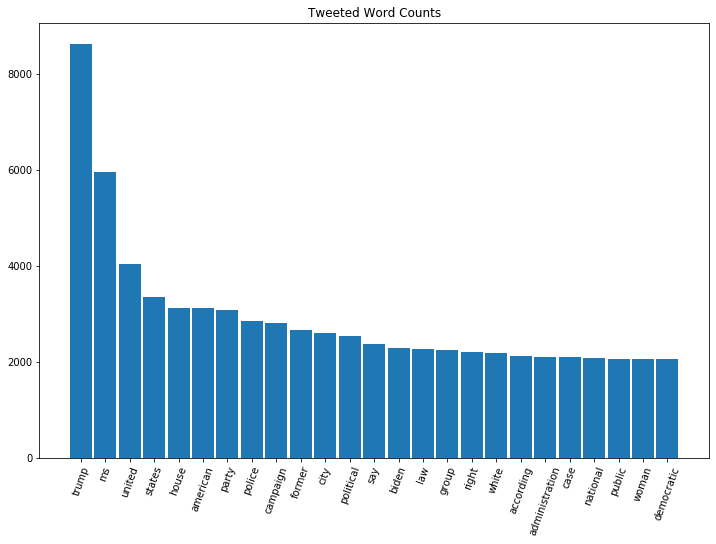

In [284]:
dum2 = words_freq[:25]

plt.figure(figsize=(12,8))
plt.bar(range(len(dum2)), [val[1] for val in dum2], width = 0.9, align='center')
plt.xticks(range(len(dum2)), [val[0] for val in dum2])
plt.xticks(rotation=70)
# ax.set_xticks(ax.get_xticks()[::2])
# plt.figure(figsize=(30, 3))
plt.title('Tweeted Word Counts')
plt.show()

## Normalize, Vectorize, and apply LDA to FT articles

In [2]:
ft_data_list = []

In [5]:
with open('ft_data.json') as f:
    for line in f:
        ft_data_list.append(eval(line))

In [6]:
cols = ['paper', 'date', 'section', 'url', 'headline', 'text']

In [7]:
df = pd.DataFrame.from_records(nyt_data_list, columns=cols)

In [3]:
pat = '^\d+\\n'
p = re.compile(pat)

unique_ft_articles = []
unique_urls = []
with open('ft_data.json', 'r') as file:
    for line in file:
        data_dict = eval(line)
        url = data_dict['url']
        if url not in unique_urls:
            unique_urls.append(url)
            # clean up text:
            text = p.sub('', data_dict['text'])
            data_dict['text'] = text
            unique_ft_articles.append(data_dict)

In [4]:
len(unique_ft_articles)

1727

In [5]:
ft_df = pd.DataFrame.from_records(unique_ft_articles)

In [6]:
len(ft_df)

1727

In [7]:
ft_df.head()

date                                           headline paper  \
0  2019-10-13  Argentina’s economic woes spell doom for Macri...    FT   
1  2019-10-13  Iran: hardliners’ anti-graft drive masks wider...    FT   
2  2019-10-13              Private schools/Labour: Eton disorder    FT   
3  2019-10-13  Investment pot overflows as Germany’s infrastr...    FT   
4  2019-10-13  Yorkshire Post tests the value of trust in div...    FT   

  section                                               text  \
0   World  Argentina’s president Mauricio Macri sounded a...   
1   World  It wasn’t his “luxury” house that made Iranian...   
2   World  Eton, its former head liked to point out, is a...   
3   World  The Fritz Karsen school in Berlin is in dire n...   
4   World  At a time when the UK’s main political parties...   

                                                 url  
0  https://www.ft.com/content/59e751c0-e8f6-11e9-...  
1  https://www.ft.com/content/d0fe931e-d946-11e9-...  
2  https://www.ft.com/content/eea3e139-6cbf-477a-...  
3  https://www.ft.com/content/a8e535e0-e837-11e9-...  
4  https://www.ft.com/content/97fd36f8-df89-11e9-...

In [9]:
with open('new_ft_df.pkl', 'wb') as f:
    pickle.dump(ft_df, f)

In [320]:
ft_df['norm_text'] = ft_df.text.apply(tn.normalize)

In [321]:
ft_df['full_norm_text'] = ft_df.norm_text.apply(lambda x: ' '.join(x))

In [322]:
ft_df.head(200)

date                                           headline paper  \
0    2019-10-13  Argentina’s economic woes spell doom for Macri...    FT   
1    2019-10-13  Iran: hardliners’ anti-graft drive masks wider...    FT   
2    2019-10-13              Private schools/Labour: Eton disorder    FT   
3    2019-10-13  Investment pot overflows as Germany’s infrastr...    FT   
4    2019-10-13  Yorkshire Post tests the value of trust in div...    FT   
5    2019-10-13  Government jobs watchdog pleads for greater po...    FT   
6    2019-10-13  Russia looks at alternatives to dollar for ene...    FT   
7    2019-10-13      How hard has China been hit by the trade war?    FT   
8    2019-10-13    More Four Seasons care homes at risk of closure    FT   
9    2019-10-13          Turkey closes in on key Syria border town    FT   
10   2019-10-12  Ecuador imposes curfew after week of violent p...    FT   
11   2019-10-12     Venezuela turns away Guatemala’s new president    FT   
12   2019-10-12    DUP casts doubt on Brexit ‘double customs’ plan    FT   
13   2019-10-13  A no-deal Brexit must not be part of the Conse...    FT   
14   2019-10-13    Eliud Kipchoge breaks two-hour marathon barrier    FT   
15   2019-10-12  China to scrap foreign ownership caps for fund...    FT   
16   2019-10-14  China makes few concessions in trade truce wit...    FT   
17   2019-10-12  The big Brexit breakthrough? And is Downing St...    FT   
18   2019-10-12  Giuliani says he is unaware of probe into his ...    FT   
19   2019-10-12                         US law: damages limitation    FT   
20   2019-10-12  Lossmaking tech shares face rough ride as lock...    FT   
21   2019-10-12  US troops come under fire from Turkish forces ...    FT   
22   2019-10-13  Bill to help stranded air passengers features ...    FT   
23   2019-10-02  Ukrainegate: a guide to the important figures ...    FT   
24   2019-07-31    No-deal Brexit: how prepared are the EU and UK?    FT   
25   2019-09-03  US Democratic primary debate: who are the cand...    FT   
26   2019-08-12  ‘Our life has been made hell’: fury in Kashmir...    FT   
27   2019-06-27               LGBT+ Pride 2019: A year in pictures    FT   
28   2019-07-02  Christine Lagarde and Ursula von der Leyen: me...    FT   
29   2019-10-14            US agrees limited trade deal with China    FT   
30   2019-10-11    Allure of US stocks reflects great expectations    FT   
31   2019-10-11     US to deploy additional troops to Saudi Arabia    FT   
32   2019-10-14  Week ahead: US earnings, EU summit and IMF ann...    FT   
33   2019-10-11  Veteran Fox anchor and Trump critic Shepard Sm...    FT   
34   2019-10-11      IMF says Mexico’s policies are hurting growth    FT   
35   2019-10-11  Can ex-prisoners help fill the UK’s labour sho...    FT   
36   2019-10-11  SNP tries to force Labour to support second in...    FT   
37   2019-10-11  Politicians should be careful in the great out...    FT   
38   2019-10-11  Trade bodies appeal for regulatory alignment p...    FT   
39   2019-10-14        Sunnier skies and the risk of getting stung    FT   
40   2019-10-11  How a tiny London publisher picked two Nobel P...    FT   
41   2019-10-11  Riyadh holds talks with Houthis in effort to b...    FT   
42   2019-10-11  Labour leadership eyes pushing for second Brex...    FT   
43   2019-10-11    Brussels to hold intensive Brexit talks with UK    FT   
44   2019-10-11  UK set to miss goal to cut carbon emissions to...    FT   
45   2019-10-11  ‘Boris bus’ maker Wrightbus finds rescuer in J...    FT   
46   2019-10-11  Trump accused of ‘concerted campaign’ to oust ...    FT   
47   2019-10-11  How Boris Johnson moved to break the Brexit de...    FT   
48   2019-10-11  Yandex shares fall heavily as Russia mulls for...    FT   
49   2019-10-11  John McDonnell says he will step down if Labou...    FT   
50   2019-10-11          How US-China contest rebounded on the NBA    FT   
51   2019-10-11  Iran says oil tanker hit by two missiles o

In [401]:
len(ft_df)

1727

In [403]:
ft_df.head(200)

date                                           headline paper  \
0    2019-10-13  Argentina’s economic woes spell doom for Macri...    FT   
1    2019-10-13  Iran: hardliners’ anti-graft drive masks wider...    FT   
2    2019-10-13              Private schools/Labour: Eton disorder    FT   
3    2019-10-13  Investment pot overflows as Germany’s infrastr...    FT   
4    2019-10-13  Yorkshire Post tests the value of trust in div...    FT   
5    2019-10-13  Government jobs watchdog pleads for greater po...    FT   
6    2019-10-13  Russia looks at alternatives to dollar for ene...    FT   
7    2019-10-13      How hard has China been hit by the trade war?    FT   
8    2019-10-13    More Four Seasons care homes at risk of closure    FT   
9    2019-10-13          Turkey closes in on key Syria border town    FT   
10   2019-10-12  Ecuador imposes curfew after week of violent p...    FT   
11   2019-10-12     Venezuela turns away Guatemala’s new president    FT   
12   2019-10-12    DUP casts doubt on Brexit ‘double customs’ plan    FT   
13   2019-10-13  A no-deal Brexit must not be part of the Conse...    FT   
14   2019-10-13    Eliud Kipchoge breaks two-hour marathon barrier    FT   
15   2019-10-12  China to scrap foreign ownership caps for fund...    FT   
16   2019-10-14  China makes few concessions in trade truce wit...    FT   
17   2019-10-12  The big Brexit breakthrough? And is Downing St...    FT   
18   2019-10-12  Giuliani says he is unaware of probe into his ...    FT   
19   2019-10-12                         US law: damages limitation    FT   
20   2019-10-12  Lossmaking tech shares face rough ride as lock...    FT   
21   2019-10-12  US troops come under fire from Turkish forces ...    FT   
22   2019-10-13  Bill to help stranded air passengers features ...    FT   
23   2019-10-02  Ukrainegate: a guide to the important figures ...    FT   
24   2019-07-31    No-deal Brexit: how prepared are the EU and UK?    FT   
25   2019-09-03  US Democratic primary debate: who are the cand...    FT   
26   2019-08-12  ‘Our life has been made hell’: fury in Kashmir...    FT   
27   2019-06-27               LGBT+ Pride 2019: A year in pictures    FT   
28   2019-07-02  Christine Lagarde and Ursula von der Leyen: me...    FT   
29   2019-10-14            US agrees limited trade deal with China    FT   
30   2019-10-11    Allure of US stocks reflects great expectations    FT   
31   2019-10-11     US to deploy additional troops to Saudi Arabia    FT   
32   2019-10-14  Week ahead: US earnings, EU summit and IMF ann...    FT   
33   2019-10-11  Veteran Fox anchor and Trump critic Shepard Sm...    FT   
34   2019-10-11      IMF says Mexico’s policies are hurting growth    FT   
35   2019-10-11  Can ex-prisoners help fill the UK’s labour sho...    FT   
36   2019-10-11  SNP tries to force Labour to support second in...    FT   
37   2019-10-11  Politicians should be careful in the great out...    FT   
38   2019-10-11  Trade bodies appeal for regulatory alignment p...    FT   
39   2019-10-14        Sunnier skies and the risk of getting stung    FT   
40   2019-10-11  How a tiny London publisher picked two Nobel P...    FT   
41   2019-10-11  Riyadh holds talks with Houthis in effort to b...    FT   
42   2019-10-11  Labour leadership eyes pushing for second Brex...    FT   
43   2019-10-11    Brussels to hold intensive Brexit talks with UK    FT   
44   2019-10-11  UK set to miss goal to cut carbon emissions to...    FT   
45   2019-10-11  ‘Boris bus’ maker Wrightbus finds rescuer in J...    FT   
46   2019-10-11  Trump accused of ‘concerted campaign’ to oust ...    FT   
47   2019-10-11  How Boris Johnson moved to break the Brexit de...    FT   
48   2019-10-11  Yandex shares fall heavily as Russia mulls for...    FT   
49   2019-10-11  John McDonnell says he will step down if Labou...    FT   
50   2019-10-11          How US-China contest rebounded on the NBA    FT   
51   2019-10-11  Iran says oil tanker hit by two missiles o

In [402]:
ft_df.to_csv('ALL_FT_WORLD.csv')

UnicodeEncodeError: 'utf-8' codec can't encode characters in position 3905-3906: surrogates not allowed

In [404]:
with open('FT_ALL_WORLD.pkl', 'wb') as f:
    pickle.dump(ft_df, f)

In [332]:
ft_count_vectorizer = CountVectorizer(min_df=5, max_df=.5)

In [333]:
ft_vec_txfm = ft_count_vectorizer.fit_transform(ft_df.full_norm_text)

In [334]:
ft_vec_txfm.shape

(1727, 10861)

In [327]:
len(ft_vec_txfm.toarray())

1727

In [335]:
ft_sum_words = ft_vec_txfm.sum(axis=0) 

In [336]:
ft_words_freq = [(word, ft_sum_words[0, idx]) for word, idx in     ft_count_vectorizer.vocabulary_.items()]

In [337]:
ft_words_freq =sorted(ft_words_freq, key = lambda x: x[1], reverse=True)

In [338]:
ft_words_freq

[('uk', 2941),
 ('brexit', 2851),
 ('company', 2830),
 ('market', 2700),
 ('eu', 2461),
 ('deal', 2411),
 ('bank', 2357),
 ('johnson', 2225),
 ('china', 2208),
 ('trump', 2197),
 ('president', 2024),
 ('people', 1960),
 ('trade', 1890),
 ('party', 1831),
 ('minister', 1775),
 ('say', 1773),
 ('business', 1735),
 ('world', 1611),
 ('rate', 1508),
 ('since', 1439),
 ('policy', 1426),
 ('economy', 1418),
 ('first', 1415),
 ('group', 1393),
 ('global', 1384),
 ('financial', 1375),
 ('sign', 1348),
 ('many', 1300),
 ('prime', 1296),
 ('day', 1270),
 ('state', 1259),
 ('growth', 1243),
 ('may', 1212),
 ('even', 1187),
 ('political', 1166),
 ('election', 1165),
 ('investment', 1162),
 ('make', 1130),
 ('court', 1119),
 ('next', 1093),
 ('economic', 1084),
 ('european', 1055),
 ('take', 1054),
 ('need', 1047),
 ('chief', 1045),
 ('london', 1040),
 ('official', 1038),
 ('investor', 1036),
 ('leader', 1034),
 ('chinese', 1031),
 ('plan', 1028),
 ('ms', 1004),
 ('public', 1003),
 ('according', 10

In [339]:
FT_LDA = LatentDirichletAllocation(n_components=20)

In [340]:
ft_lda = FT_LDA.fit_transform(ft_vec_txfm)

In [341]:
len(FT_LDA.components_)

20

In [342]:
ft_names = ft_count_vectorizer.get_feature_names()

In [343]:
len(ft_names)

10861

In [227]:
topics = dict()

In [228]:
for idx, topic in enumerate(LDA.components_):
    features = topic.argsort()[:-(-25-1):-1]
    tokens = [names[i] for i in features]
    topics[idx] = tokens

In [230]:
topics.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [231]:
len(topics[0])

10819

In [344]:
display_topics(FT_LDA, ft_names, no_top_words=25)

Topic 0:	johnson
		brexit
		deal
		minister
		prime
		uk
		eu
		boris
		october
		parliament
		no
		mps
		election
		party
		31
		sign
		commons
		sep
		court
		briefing
		act
		day
		extension
		general
		labour

Topic 1:	eu
		uk
		brexit
		ireland
		deal
		border
		northern
		custom
		irish
		johnson
		proposal
		britain
		plan
		trade
		british
		sign
		backstop
		agreement
		good
		check
		no
		brussels
		briefing
		european
		rule

Topic 2:	india
		health
		people
		say
		indian
		nissan
		world
		modi
		many
		company
		state
		000
		delhi
		argentina
		president
		indonesia
		part
		like
		population
		system
		city
		century
		ghosn
		healthcare
		work

Topic 3:	party
		china
		taiwan
		people
		communist
		xi
		beijing
		trudeau
		election
		spain
		military
		chinese
		sánchez
		right
		leader
		kurz
		political
		war
		kashmir
		parade
		day
		many
		civil
		vote
		franco

Topic 4:	oil
		saudi
		iran
		attack
		arabia
		energy
		production
		kingdom
		iranian
		price
		sanct

[{0: ['johnson',
   'brexit',
   'deal',
   'minister',
   'prime',
   'uk',
   'eu',
   'boris',
   'october',
   'parliament',
   'no',
   'mps',
   'election',
   'party',
   '31',
   'sign',
   'commons',
   'sep',
   'court',
   'briefing',
   'act',
   'day',
   'extension',
   'general',
   'labour']},
 {1: ['eu',
   'uk',
   'brexit',
   'ireland',
   'deal',
   'border',
   'northern',
   'custom',
   'irish',
   'johnson',
   'proposal',
   'britain',
   'plan',
   'trade',
   'british',
   'sign',
   'backstop',
   'agreement',
   'good',
   'check',
   'no',
   'brussels',
   'briefing',
   'european',
   'rule']},
 {2: ['india',
   'health',
   'people',
   'say',
   'indian',
   'nissan',
   'world',
   'modi',
   'many',
   'company',
   'state',
   '000',
   'delhi',
   'argentina',
   'president',
   'indonesia',
   'part',
   'like',
   'population',
   'system',
   'city',
   'century',
   'ghosn',
   'healthcare',
   'work']},
 {3: ['party',
   'china',
   'taiwan',

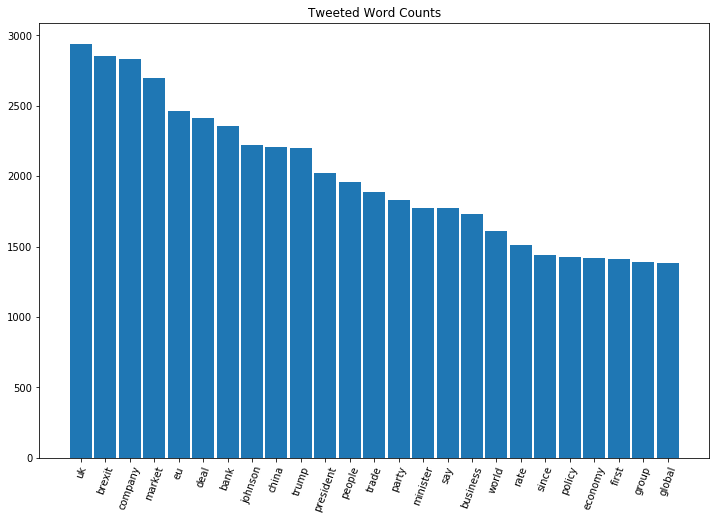

In [345]:
dum2 = ft_words_freq[:25]

plt.figure(figsize=(12,8))
plt.bar(range(len(dum2)), [val[1] for val in dum2], width = 0.9, align='center')
plt.xticks(range(len(dum2)), [val[0] for val in dum2])
plt.xticks(rotation=70)
# ax.set_xticks(ax.get_xticks()[::2])
# plt.figure(figsize=(30, 3))
plt.title('Tweeted Word Counts')
plt.show()

## Reuters - normalize, vectorize, and LDA

In [392]:
# pat = '^\d+\\n'
# p = rr.compile(pat)

unique_rt_articles = []
unique_urls = []
with open('rt_data.json', 'r') as file:
    for line in file:
        data_dict = eval(line)
        url = data_dict['url']
        if url not in unique_urls:
            unique_urls.append(url)
            # clean up text:
#             text = p.sub('', data_dict['text'])
#             data_dict['text'] = text
            unique_rt_articles.append(data_dict)

In [393]:
len(unique_rt_articles)

2599

In [396]:
ALL_RT_WORLD_DF = pd.DataFrame.from_records(unique_rt_articles)

In [398]:
ALL_RT_WORLD_DF.head()

date                                           headline paper  \
0  2019-10-12  Turkish-led forces advance into Syrian border ...    RT   
1  2019-10-12  SDF says Turkey-backed rebels killed Kurdish p...    RT   
2  2019-10-12       Iran decries 'cowardly attack' on oil tanker    RT   
3  2019-10-12  At least 10 Kenyan police killed by bomb near ...    RT   
4  2019-10-12  Graves desecrated at Commonwealth war cemetery...    RT   

  section                                               text  \
0   World  ANKARA/Turkish-backed Syrian rebels advanced i...   
1   World  The Kurdish-led Syrian Democratic Forces accus...   
2   World  An Iranian government spokesman on Saturday de...   
3   World  At least ten Kenyan police were killed when th...   
4   World  Dozens of gravestones at a Commonwealth milita...   

                                                 url  
0  https://www.reuters.com/article/us-syria-secur...  
1  https://www.reuters.com/article/us-syria-secur...  
2  https://www.reuters.com/article/us-mideast-ira...  
3  https://www.reuters.com/article/us-kenya-secur...  
4  https://www.reuters.com/article/us-israel-brit...

In [399]:
len(ALL_RT_WORLD_DF)

2599

In [400]:
ALL_RT_WORLD_DF.to_csv('ALL_RT_WORLD.csv')

## GENSIM!

In [360]:
import gensim

In [361]:
corpus = ft_df['norm_text']

In [363]:
corpus.shape

(1727,)

In [364]:
from gensim import corpora

In [365]:
dictionary = corpora.Dictionary(corpus)

In [366]:
print(dictionary.token2id)

{'$': 0, '11': 1, '16': 2, '20': 3, '2015': 4, '25th': 5, '27': 6, '57bn': 7, '930,000': 8, 'able': 9, 'acclamation': 10, 'accurate': 11, 'act': 12, 'added': 13, 'addressed': 14, 'administration': 15, 'admit': 16, 'advance': 17, 'aide': 18, 'aires': 19, 'alberto': 20, 'almost': 21, 'already': 22, 'another': 23, 'anyone': 24, 'anything': 25, 'apologetic': 26, 'appeal': 27, 'approach': 28, 'argentina': 29, 'argentine': 30, 'argentines': 31, 'asset': 32, 'attacking': 33, 'august': 34, 'avoided': 35, 'awada': 36, 'back': 37, 'bailout': 38, 'banker': 39, 'banner': 40, 'barely': 41, 'barometer': 42, 'baron': 43, 'base': 44, 'based': 45, 'battered': 46, 'behind': 47, 'belief': 48, 'best': 49, 'beyond': 50, 'bidding': 51, 'big': 52, 'black': 53, 'bloomberg': 54, 'blow': 55, 'buenos': 56, 'business': 57, 'businesswoman': 58, 'cambiemos': 59, 'came': 60, 'campaign': 61, 'candidate': 62, 'case': 63, 'caution': 64, 'chair': 65, 'changed': 66, 'chaotic': 67, 'charisma': 68, 'cheered': 69, 'chimed':

In [367]:
bow_corpus = [dictionary.doc2bow(text) for text in corpus]

In [368]:
bow_corpus
from gensim import models
# train the model
tfidf = models.TfidfModel(bow_corpus)from gensim import models
# train the model
tfidf = models.TfidfModel(bow_corpus)

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 4),
  (20, 2),
  (21, 2),
  (22, 3),
  (23, 3),
  (24, 1),
  (25, 2),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 5),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 3),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 4),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 6),
  (62, 3),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 2),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 2),
  (87, 4),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [369]:
from gensim import models
# train the model
tfidf = models.TfidfModel(bow_corpus)

In [370]:
tfidf[dictionary.doc2bow("system minors".lower().split())]

[(996, 1.0)]

In [371]:
from gensim.sklearn_api import lsimodel, ldamodel

In [372]:
gensim_lda = ldamodel.LdaTransformer(num_topics=25)

In [374]:
gensim_lda.fit(bow_corpus)

LdaTransformer(alpha='symmetric', chunksize=2000, decay=0.5,
               dtype=<class 'numpy.float32'>, eta=None, eval_every=10,
               gamma_threshold=0.001, id2word=None, iterations=50,
               minimum_probability=0.01, num_topics=25, offset=1.0, passes=1,
               random_state=None, scorer='perplexity', update_every=1)

In [379]:
gensim_lda.gensim_model.get_topics

<bound method LdaModel.get_topics of <gensim.models.ldamodel.LdaModel object at 0x1a3e4e9630>>

In [380]:
gensim_lda.gensim_model.show_topics()

[(16,
  '0.010*"237" + 0.009*"323" + 0.007*"838" + 0.006*"418" + 0.006*"521" + 0.005*"415" + 0.004*"1179" + 0.004*"809" + 0.004*"160" + 0.004*"1038"'),
 (13,
  '0.008*"838" + 0.008*"521" + 0.008*"418" + 0.007*"323" + 0.006*"224" + 0.005*"491" + 0.005*"529" + 0.005*"415" + 0.005*"237" + 0.004*"160"'),
 (0,
  '0.011*"237" + 0.007*"323" + 0.006*"418" + 0.005*"542" + 0.005*"415" + 0.005*"1038" + 0.004*"252" + 0.004*"809" + 0.003*"1601" + 0.003*"160"'),
 (14,
  '0.014*"237" + 0.007*"415" + 0.005*"160" + 0.005*"1038" + 0.005*"323" + 0.005*"418" + 0.004*"809" + 0.004*"1490" + 0.004*"1601" + 0.004*"626"'),
 (3,
  '0.011*"323" + 0.011*"237" + 0.007*"415" + 0.005*"418" + 0.005*"1490" + 0.004*"542" + 0.004*"1038" + 0.004*"809" + 0.004*"252" + 0.004*"467"'),
 (2,
  '0.012*"323" + 0.007*"415" + 0.007*"237" + 0.005*"809" + 0.005*"1179" + 0.004*"418" + 0.004*"542" + 0.004*"1038" + 0.004*"626" + 0.004*"521"'),
 (1,
  '0.010*"323" + 0.008*"237" + 0.006*"418" + 0.005*"1038" + 0.004*"1792" + 0.004*"838" 

In [377]:
print(gensim_lda.model.named_steps['norm'])

AttributeError: 'LdaTransformer' object has no attribute 'model'